In [ ]:
# 02_Colab & Pytorch

# 1. Colab 사용법 알기

In [ ]:
print("Hello World!")

Hello World!


In [ ]:
x = range(10)

In [ ]:
for i in x:
  print(i)

0
1
2
3
4
5
6
7
8
9


In [ ]:
# 딥러닝 실습 환경을 세팅: 라이브러리 설치

# torch : 파이토치(PyTorch, 딥러닝 프레임워크)를 설치합니다.
!pip install torch

# torchvision : 이미지 관련 데이터셋(MNIST, CIFAR-10 등),
# 모델, 변환 함수 등을 포함한 라이브러리입니다.
!pip install torchvision

In [ ]:
# 현재 할당된 GPU 장치의 상태를 확인합니다.
# nvidia-smi는 NVIDIA에서 제공하는 유틸리티로,
# GPU 메모리 사용량, 드라이버 버전, GPU 모델 등을 보여줍니다.

!nvidia-smi

# 런타임 유형 변경해서 GPU 사용하는 설정으로 바꿔줘야 하는데, 강의 중에 알려주려나?

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# 구글 클라우드(Google Cloud) 자원에 접근할 수 있도록 사용자 인증을 합니다.
# 특정 데이터셋을 Google Cloud Storage에서 불러오거나,
# 개인 계정의 데이터 접근 시 필요합니다.
from google.colab import auth
auth.authenticate_user()

# 내 Google Drive를 코랩 환경(/content/gdrive)에 연결(mount)합니다.
# 이렇게 하면 내 드라이브에 있는 데이터셋을 불러오거나,
# 학습 결과(모델 파일 등)를 드라이브에 저장할 수 있습니다.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Code snippets 사용해보기

# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color='Origin'
).interactive()

alt.Chart(...)

# 2. ML practice

 - MNIST dataset을 Logistic Regression으로 Classification
 - MNIST Dataset
 손글씨 숫자 데이터셋 (0~9)
 각 이미지: 28x28 픽셀, 흑백 이미지
 총 70,000개 이미지 (훈련: 60,000개, 테스트: 10,000개)
 👉 딥러닝/머신러닝에서 "Hello World" 같은 기본 예제로 쓰입니다.
- 📊 Logistic Regression
  회귀(regression)라는 이름이 붙어 있지만 분류(Classification) 알고리즘입니다.
  입력값이 주어졌을 때 특정 클래스(범주)에 속할 확률을 예측합니다.
    - 특징: 입력값을 선형결합 한 뒤 sigmoid 함수(0~1로 압축)를 통과시켜서 "이 데이터가 특정 클래스일 확률"을 계산합니다.

    - 예시: MNIST에서 이미지 픽셀 값 → (가중치·합) → sigmoid → '이 숫자가 5일 확률'. 실제 MNIST 전체 분류에는 다중 로지스틱 회귀(softmax regression)를 씁니다.

## 1. Data Load

In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import fetch_openml

# dataset load
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape
x_data = mnist.data
y_data = mnist.target

Scikit-learn (sklearn) 모듈별 설명:
- model_selection: 데이터셋을 훈련/검증/테스트 세트로 나누거나 교차검증 등을 수행

- linear_model.LogisticRegression: 로지스틱 회귀 모델 제공

- metrics: 정확도, 정밀도, 재현율 등 평가 지표 제공

- datasets.fetch_openml: OpenML 사이트에서 유명 데이터셋 다운로드

---
`mnist = fetch_openml('mnist_784')`
- OpenML에서 MNIST 손글씨 숫자 데이터셋(784는 28×28 픽셀 이미지라는 뜻)을 가져옴.
- mnist는 Bunch 객체인데, 딕셔너리와 비슷함.
  - mnist.data: 특징 데이터 (픽셀값, 70000 × 784)

  - mnist.target: 정답(label, 70000개의 숫자)

---
`mnist.data.shape, mnist.target.shape`
- shape: 배열이나 데이터프레임의 **크기(행, 열)**를 튜플로 반환

  - 예:
    mnist.data.shape → (70000, 784) (70,000개의 이미지, 각 이미지 784픽셀)
    mnist.target.shape → (70000,) (70,000개의 정답)

In [ ]:
print(x_data.shape)
print(y_data.shape)

(70000, 784)
(70000,)


In [ ]:
print(x_data.iloc[0])
print(y_data.iloc[0])

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64
5


`.iloc`: pandas의 인덱스 기반(index-based) 선택 기능

---

cf.

data : 입력 데이터(특징, feature)

target : 정답 데이터(레이블, label)

## 2. Data visualization

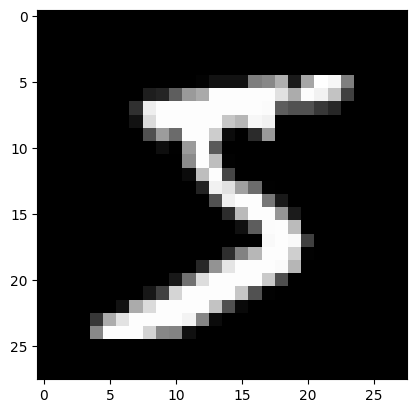

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_data.iloc[0].values.reshape(28,28), cmap='gray')

- `matplotlib.pyplot`: 파이썬 대표 시각화 라이브러리

- `%matplotlib inline`: 주피터/코랩 환경에서 그래프를 노트북 셀 안에 바로 표시하게 하는 매직 명령어
- `plt.imshow()`: 이미지를 화면에 표시
  - `x_data.iloc[0]`: 첫 번째 데이터(784차원 벡터)
  - `.values.reshape(28,28)`: 784차원 벡터를 28x28 행렬로 변환 (이미지 형태 복원)
  - `cmap='gray'`: 흑백(그레이스케일)으로 출력
  

## 3. train/test data split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(56000, 784)
(14000, 784)
(56000,)
(14000,)


- `train_test_split`: 데이터셋을 훈련용 / 테스트용으로 분할
- `test_size=0.2`: 전체 데이터의 20%를 테스트 세트로 사용
- `random_state=42`: 랜덤 시드를 고정 (재실행해도 같은 분할 결과 보장)

## 4. model training and evaluation

In [ ]:
model = LogisticRegression(max_iter=10, tol=0.0001, penalty='l2', C=1.0)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_train_predict)
print(train_acc)
y_test_predict = model.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_test_predict)
print(test_acc)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8824107142857143
0.8825714285714286


1. `LogisticRegression`: 로지스틱 회귀 분류 모델 정의
- 주요 파라미터:
  - `max_iter=10`: 최적화 알고리즘 반복 횟수 (10번만 반복해서 점점 gradient descent해보는 것)
  - `tol=0.0001`: 수렴 조건, 손실 변화량이 이 값보다 작으면 학습 종료
  - `penalty='l2'`: 가중치에 L2 정규화 적용 (overfitting 방지)
  - `C=1.0`: 정규화 강도 조절 (작을수록 규제가 강함)

---

2. 모델 학습(trainning)

`model.fit(X_train, y_train)` 훈련 데이터(X_train, y_train)를 이용해 모델 학습(가중치 최적화)을 수행

---

3. 예측 및 정확도 평가
```
y_train_predict = model.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_train_predict)
print(train_acc)

y_test_predict = model.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_test_predict)
print(test_acc)
```
- `model.predict()`: 입력 데이터를 넣어 예측한 결과 반환
- metrics.accuracy_score(): 정답과 비교하여 정확도(Accuracy) 계산
- train_acc: 훈련 데이터 정확도
- test_acc: 테스트 데이터 정확도


In [ ]:
model = LogisticRegression(max_iter=100, tol=0.0001, penalty='l2', C=1.0)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_train_predict)
print(train_acc)
y_test_predict = model.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_test_predict)
print(test_acc)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9360892857142857
0.9178571428571428


In [ ]:
model = LogisticRegression(max_iter=1000, tol=0.0001, penalty='l2', C=1.0)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_train_predict)
print(train_acc)
y_test_predict = model.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_test_predict)
print(test_acc)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.943125
0.916


- 0.943125 -> 0.916으로 좀 유의미하게 떨어지는 것 같으니 오버피팅이라고 판단할 수도 있을 것이다.

# 3. Pytorch

: python 기반 deep learning 프레임워크

In [ ]:
!pip install torch
!pip install torchvision

numpy와 tensor는 데이터를 n차원으로 나타내는 arr라는 점에서 공통점이 있지만.
- numpy는 gpu에서 연산 불가능
- tensor는 grad와 gpu 연산 가능
의 차이가 있다.

In [ ]:
# torch.tensor(data, dtype=None, device=None, requires_grad=False, pin_memory=False)

import torch

x = torch.zeros(4)
print(x)
x = torch.zeros([2,3])
print(x)
x = torch.ones(4)
print(x)
x = torch.ones([2,3,1])
print(x)

tensor([0., 0., 0., 0.])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([1., 1., 1., 1.])
tensor([[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]])


- 일반적으로는 numpy에서 tensor로 옮기는 경우가 많음. AI 학습 돌리기 전에 데이터 전처리 시각화 등을 먼저 해보기때문에!

In [ ]:
import numpy as np
import torch

data = [[1,2,3], [4,5,6]]

x = torch.tensor(data)
print(x)
data_arr = np.array([[4,3],[1,3],[5,5]])
x = torch.tensor(data_arr)
print(x)
x = torch.from_numpy(data_arr)
print(x)
x = torch.randn([3,5])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[4, 3],
        [1, 3],
        [5, 5]])
tensor([[4, 3],
        [1, 3],
        [5, 5]])
tensor([[ 0.9781, -0.2247,  0.1067,  0.3875, -0.7654],
        [-0.6148, -0.9263,  0.1829, -0.6760,  0.0378],
        [-0.9354, -1.7313, -0.5958, -1.5380, -0.6026]])


- `torch.randn([3,5])`
  - randn = "random normal"의 약자

  - 표준 정규분포(평균 0, 표준편차 1)에서 샘플링한 랜덤 값으로 텐서를 생성

  - [3,5] → 텐서의 크기 (3행 5열)

  👉 즉, (3×5) 크기의 난수 행렬을 정규분포에서 뽑아서 생성

In [ ]:
tensor = torch.randn([2,3])

print(f"Shape if tensor: {tensor.shape}")
print(tensor.dtype)
print(tensor.device)
print(tensor[0]) # 0번째 행
print(tensor[:,0]) # 0번째 열
print(tensor[...,-1]) # 마지막 열
tensor[:, 1] = 0
print(tensor)

Shape if tensor: torch.Size([2, 3])
torch.float32
cpu
tensor([ 1.2993, -0.1316, -0.2037])
tensor([ 1.2993, -0.1050])
tensor([-0.2037,  2.2178])
tensor([[ 1.2993,  0.0000, -0.2037],
        [-0.1050,  0.0000,  2.2178]])


In [ ]:
import torch
import torch.nn as nn
import numpy as np

tensor_one = torch.tensor([[5,8,6],[8,4,5]], dtype=torch.float64, requires_grad=True)
tensor_two = torch.randn([2,3], dtype=torch.float64, requires_grad=True)
print(tensor_one)
print(tensor_two)

y1 = torch.add(tensor_one, tensor_two)
y2 = tensor_one+tensor_two
print(y1)
print(y2)
"""
- torch.add(x, y): 두 텐서를 원소별(element-wise)로 더함
- x + y: 파이썬의 연산자 오버로딩 → 내부적으로 torch.add 실행
- y1과 y2는 같은 결과
"""

y1 = torch.mul(tensor_one, tensor_two)
y2 = tensor_one*tensor_two
print(y1)
print(y2)
"""
- torch.mul(x, y): 원소별(element-wise) 곱
- x * y: 연산자 오버로딩 → 내부적으로 torch.mul 실행
- 결과: 각 위치의 값끼리 곱한 텐서
"""

y1 = torch.matmul(tensor_one, tensor_two.T)
y2 = tensor_one@tensor_two.T
print(y1)
print(y2)
"""
- torch.matmul(A, B): 두 텐서의 행렬 곱(matrix multiplication) 수행
- A @ B: 파이썬 연산자 오버로딩 → 내부적으로 torch.matmul 실행
- tensor_two.T: 전치(transpose), 즉 행과 열을 바꿈
- 결과 크기: (2×3) × (3×2) = (2×2)
"""

tensor([[5., 8., 6.],
        [8., 4., 5.]], dtype=torch.float64, requires_grad=True)
tensor([[ 0.4832, -1.5469,  0.3656],
        [ 0.9193,  0.8997,  0.7291]], dtype=torch.float64, requires_grad=True)
tensor([[5.4832, 6.4531, 6.3656],
        [8.9193, 4.8997, 5.7291]], dtype=torch.float64, grad_fn=<AddBackward0>)
tensor([[5.4832, 6.4531, 6.3656],
        [8.9193, 4.8997, 5.7291]], dtype=torch.float64, grad_fn=<AddBackward0>)
tensor([[  2.4161, -12.3751,   2.1935],
        [  7.3545,   3.5990,   3.6453]], dtype=torch.float64,
       grad_fn=<MulBackward0>)
tensor([[  2.4161, -12.3751,   2.1935],
        [  7.3545,   3.5990,   3.6453]], dtype=torch.float64,
       grad_fn=<MulBackward0>)
tensor([[-7.7656, 16.1688],
        [-0.4940, 14.5987]], dtype=torch.float64, grad_fn=<MmBackward0>)
tensor([[-7.7656, 16.1688],
        [-0.4940, 14.5987]], dtype=torch.float64, grad_fn=<MmBackward0>)


'\n- torch.matmul(A, B): 두 텐서의 행렬 곱(matrix multiplication) 수행\n- A @ B: 파이썬 연산자 오버로딩 → 내부적으로 torch.matmul 실행\n- tensor_two.T: 전치(transpose), 즉 행과 열을 바꿈\n- 결과 크기: (2×3) × (3×2) = (2×2)\n'

In [ ]:
x = torch.tensor([5], dtype=torch.float64, requires_grad=True)
y = torch.tensor([2], dtype=torch.float64, requires_grad=True)
z = x * y
z.backward()
print(x.grad) # dy/dx = y = 2
print(y.grad) # dx/dy = x = 5

gradient = 기울기

수학적으로는 함수의 각 변수에 대한 편미분 값들을 모아놓은 벡터.

즉, 함수가 어느 방향으로 얼마나 변하는지를 알려주는 변화율의 방향 + 크기.

---

- **자동미분(autograd)** 시스템은 연산을 "그래프"로 기록합니다.
    - 예: `z = x * y` → "z는 x와 y의 곱"이라는 그래프 노드 생성.
- `z.backward()`를 호출하면:
    1. 그래프를 **뒤로(backward)** 따라가면서
    2. 각 변수(x, y)에 대한 미분값(gradient)을 계산해서
    3. `x.grad`, `y.grad`에 저장합니다.

즉, `backward()` = "출력 z를 기준으로 입력 변수들의 gradient를 계산해라"는 명령어예요.

In [1]:
import torch
import numpy

# tensor → numpy / numpy → tensor를 했을 때
# tensor와 numpy array가 cpu에 있다면 메모리를 공유함

t = torch.ones(5)
print(f"t: {t}")

n = t.numpy()
print(n)

t.add_(3)
print(t)
print(n)

t: tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([4., 4., 4., 4., 4.])
[4. 4. 4. 4. 4.]


- 같은 cpu에 있어서 값을 공유함(나중에 과제할 때 주의할 것)


In [ ]:
# view → tensor의 shape을 바꿔줌(numpy에 reshape)
x1 = torch.randn(4,5)   # (4행, 5열) = 총 20개 원소
x2 = x1.view(20)        # 1차원 (20,) 벡터로 변환
x3 = x1.view(2,-1)      # -1은 남는 차원을 자동으로 맞춰줌 → (2, 10)
x4 = x1.view(2,2,5)     # 3차원 텐서 → (2, 2, 5)

print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)

torch.Size([4, 5])
torch.Size([20])
torch.Size([2, 10])
torch.Size([2, 2, 5])


---

데이터 차원을 바꿔야 할 때 자주 사용함.(머신러닝에서는 거의 안 사용하지만, 딥러닝에서는 차원을 잘 다뤄줘야 함. GPT가 차원 문제를 잘 못 해결해주는 편이라 해당 메서드는 기억해두는 것이 좋음)


In [ ]:
# squeeze 텐서 차원 축소
x1 = torch.randn(3,1,1,3)
print(x, x1.shape)
x2 = x1.squeeze() # 크기 1인 차원을 제거
print(x2, x2.shape)
print()

# unsqueeze 텐서 차원 확장
x1 = torch.randn(3,1,3)
print(x, x1.shape)
x2 = x1.unsqueeze(dim=0) # 특정 위치(dim)에 크기 1인 차원을 추가
print(x2, x2.shape)


tensor([[ 0.9781, -0.2247,  0.1067,  0.3875, -0.7654],
        [-0.6148, -0.9263,  0.1829, -0.6760,  0.0378],
        [-0.9354, -1.7313, -0.5958, -1.5380, -0.6026]]) torch.Size([3, 1, 1, 3])
tensor([[ 2.6725, -0.1044,  0.0955],
        [-0.8427, -1.0904, -1.3807],
        [-1.1048,  0.4123,  1.3623]]) torch.Size([3, 3])

tensor([[ 0.9781, -0.2247,  0.1067,  0.3875, -0.7654],
        [-0.6148, -0.9263,  0.1829, -0.6760,  0.0378],
        [-0.9354, -1.7313, -0.5958, -1.5380, -0.6026]]) torch.Size([3, 1, 3])
tensor([[[[ 0.4698,  0.2134, -1.1554]],

         [[ 0.5132,  0.8603,  0.6092]],

         [[-0.7107,  1.0281, -0.2752]]]]) torch.Size([1, 3, 1, 3])


---

- 코드를 외울 필요는 없는데, stack, cat의 차이 정도는 기억해둘 것

In [ ]:
x1 = torch.randn([1,2,3])
x2 = torch.randn([1,2,3])
print(x1)
print(x2)

# stack -> 차원 수 증가
"""
새로운 차원(axis)을 추가하여 텐서를 합칩니다.
즉, 기존 차원 수보다 +1 차원이 됩니다.
"""
x3 = torch.stack([x1, x2]) # 기본 dim=0
print(x3, x3.shape)
x3 = torch.stack([x1, x2], dim=1)
print(x3, x3.shape)
x3 = torch.stack([x1, x2], dim=2)
print(x3, x3.shape)
x3 = torch.stack([x1, x2], dim=3)
print(x3, x3.shape)

# cat -> 차원 수 유지
"""
기존 차원(axis)을 따라 단순히 이어붙입니다.
차원 수는 변하지 않습니다.
"""
x3 = torch.cat([x1, x2])
print(x3, x3.shape)
x3 = torch.cat([x1, x2], dim=1)
print(x3, x3.shape)
x3 = torch.cat([x1, x2], dim=2)
print(x3, x3.shape)


tensor([[[ 0.0247,  0.0151,  0.6181],
         [-0.5266, -4.0734,  0.6315]]])
tensor([[[ 0.3363, -0.6643, -0.0496],
         [ 1.1139, -0.2397, -1.5536]]])
tensor([[[[ 0.0247,  0.0151,  0.6181],
          [-0.5266, -4.0734,  0.6315]]],


        [[[ 0.3363, -0.6643, -0.0496],
          [ 1.1139, -0.2397, -1.5536]]]]) torch.Size([2, 1, 2, 3])
tensor([[[[ 0.0247,  0.0151,  0.6181],
          [-0.5266, -4.0734,  0.6315]],

         [[ 0.3363, -0.6643, -0.0496],
          [ 1.1139, -0.2397, -1.5536]]]]) torch.Size([1, 2, 2, 3])
tensor([[[[ 0.0247,  0.0151,  0.6181],
          [ 0.3363, -0.6643, -0.0496]],

         [[-0.5266, -4.0734,  0.6315],
          [ 1.1139, -0.2397, -1.5536]]]]) torch.Size([1, 2, 2, 3])
tensor([[[[ 0.0247,  0.3363],
          [ 0.0151, -0.6643],
          [ 0.6181, -0.0496]],

         [[-0.5266,  1.1139],
          [-4.0734, -0.2397],
          [ 0.6315, -1.5536]]]]) torch.Size([1, 2, 3, 2])
tensor([[[ 0.0247,  0.0151,  0.6181],
         [-0.5266, -4.0734,  0.6315]

In [ ]:
x1 = torch.stack([torch.ones(6), torch.zeros(6)], dim=0)
print(x1, x1.shape)

# chunk -> tensor를 지정한 dim 차원을 기준으로 chunks 개로 나눔
# 0번째 차원(행)을 기준으로 2개 그룹 → 각각 한 행씩
x2, x3 = torch.chunk(x1, 2, dim=0)
print(x2, x2.shape)

# 1번째 차원(열)을 기준으로 2개 그룹 → 열을 반씩 나눔
x2, x3 = torch.chunk(x1, 2, dim=1)
print(x2, x2.shape)

# split -> tensor를 지정한 dim 차원을 기준으로 일정한 크기 혹은 개수 배열로 나눔
# dim=0 기준, 크기 1씩 나누기
# (1,6), (1,6)
x2, x3 = torch.split(x1, 1, dim=0)
print(x2, x2.shape)

# dim=1 기준, 크기 2씩 나누기
# (2,2), (2,2), (2,2)
x2, x3, x4 = torch.split(x1, 2, dim=1)
print(x2, x2.shape)

tensor([[1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.]]) torch.Size([2, 6])
tensor([[1., 1., 1., 1., 1., 1.]]) torch.Size([1, 6])
tensor([[1., 1., 1.],
        [0., 0., 0.]]) torch.Size([2, 3])
tensor([[1., 1., 1., 1., 1., 1.]]) torch.Size([1, 6])
tensor([[1., 1.],
        [0., 0.]]) torch.Size([2, 2])


In [ ]:
x1 = torch.randn(2,3)
print(x1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

x1 = x1.to(device)
x2 = torch.randn(2,3,device=device)
x3 = torch.randn(2,3)

print(x1 + x2)
print(x1 + x3)

tensor([[-0.8631,  0.9394,  1.9953],
        [-2.4890, -1.7180, -0.6123]])
cpu
tensor([[-1.4993,  2.7433,  2.4499],
        [-3.5168, -2.4148, -0.2357]])
tensor([[-2.0605,  0.0468,  0.8922],
        [-1.9229, -1.6171, -1.4973]])


만약에 gpu(cuda)가 device로 들어간다면
x1, x2는 gpu
x3는 cpu에 올라가있다.
그래서 print(x1 + x3)에서 에러가 발생할 것이다.

---

# 4. programming structure


In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import fetch_openml

#dataset load
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape
x_data = mnist.data
y_data = mnist.target.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
import torch

# device = "cpu"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state= 42)
X_train, X_test = torch.Tensor(X_train.values), torch.Tensor(X_test.values)
y_train, y_test = torch.Tensor(y_train.values), torch.Tensor(y_test.values)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([56000, 784])
torch.Size([14000, 784])
torch.Size([56000])
torch.Size([14000])


In [ ]:
import torch

# 2. Model
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs
        # return self.linear(x)


In [ ]:
import torch.nn as nn

m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)
print(output.shape)
print(m.weight.shape)

torch.Size([128, 30])
torch.Size([30, 20])


In [ ]:
#hyper parameters
epochs = 1000
input_dim=784
output_dim=10
lr = 0.01
model = LogisticRegression(input_dim,output_dim)
model = model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
loss_save_arr=[]
for i in range(epochs):
##### train #####
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train.long())
    #l2_lambda = 0.001
    #l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
    #loss = loss + l2_lambda * l2_norm
    loss.backward()
    optimizer.step()
    loss_save_arr.append(loss.data)
    if(i%100==0):
        print("=====")
        print('epoch ', i)
        print('loss ', loss.data)
        _, pred = torch.max(output.data, axis=1)
        print("train_accuracy {:0.3f}".format(float((pred == y_train).sum())/y_train.size(0))) # print('prediction ', pred)
        ##### test #####
        model.eval()
        with torch.no_grad():
          output = model(X_test)
          _, pred = torch.max(output.data, axis=1)
          print("test_accuracy {:0.3f}".format(float((pred == y_test).sum())/y_test.size(0))) # print('prediction ', pred)


=====
epoch  0
loss  tensor(2.4421, device='cuda:0')
train_accuracy 0.101
test_accuracy 0.124
=====
epoch  100
loss  tensor(1.6161, device='cuda:0')
train_accuracy 0.827
test_accuracy 0.831
=====
epoch  200
loss  tensor(1.5897, device='cuda:0')
train_accuracy 0.860
test_accuracy 0.860
=====
epoch  300
loss  tensor(1.5791, device='cuda:0')
train_accuracy 0.872
test_accuracy 0.870
=====
epoch  400
loss  tensor(1.5741, device='cuda:0')
train_accuracy 0.877
test_accuracy 0.876
=====
epoch  500
loss  tensor(1.5707, device='cuda:0')
train_accuracy 0.881
test_accuracy 0.880
=====
epoch  600
loss  tensor(1.5676, device='cuda:0')
train_accuracy 0.885
test_accuracy 0.883
=====
epoch  700
loss  tensor(1.5643, device='cuda:0')
train_accuracy 0.888
test_accuracy 0.885
=====
epoch  800
loss  tensor(1.5629, device='cuda:0')
train_accuracy 0.890
test_accuracy 0.886
=====
epoch  900
loss  tensor(1.5624, device='cuda:0')
train_accuracy 0.891
test_accuracy 0.887


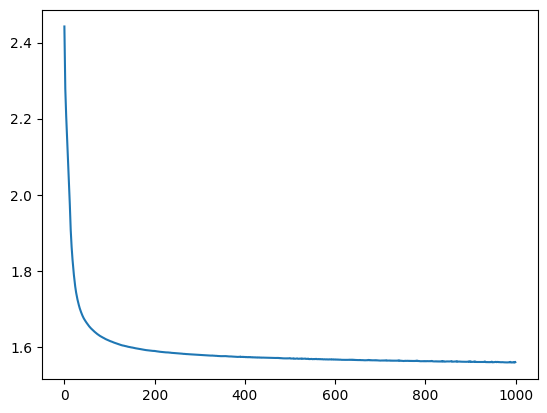

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), [e.to("cpu") for e in loss_save_arr])

---

## GPT가 준 코드 - sigmoid가 없는 코드

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import fetch_openml

#dataset load
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape
x_data = mnist.data
y_data = mnist.target.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
import torch

# device = "cpu"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state= 42)
X_train, X_test = torch.Tensor(X_train.values), torch.Tensor(X_test.values)
y_train, y_test = torch.Tensor(y_train.values), torch.Tensor(y_test.values)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([56000, 784])
torch.Size([14000, 784])
torch.Size([56000])
torch.Size([14000])


In [ ]:
import torch

# 2. Model
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)


In [ ]:
import torch.nn as nn

m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)
print(output.shape)
print(m.weight.shape)

torch.Size([128, 30])
torch.Size([30, 20])


In [ ]:
#hyper parameters
epochs = 1000
input_dim=784
output_dim=10
lr = 0.01
model = LogisticRegression(input_dim,output_dim)
model = model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
loss_save_arr=[]
for i in range(epochs):
##### train #####
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train.long())
    #l2_lambda = 0.001
    #l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
    #loss = loss + l2_lambda * l2_norm
    loss.backward()
    optimizer.step()
    loss_save_arr.append(loss.data)
    if(i%100==0):
        print("=====")
        print('epoch ', i)
        print('loss ', loss.data)
        _, pred = torch.max(output.data, axis=1)
        print("train_accuracy {:0.3f}".format(float((pred == y_train).sum())/y_train.size(0))) # print('prediction ', pred)
        ##### test #####
        model.eval()
        with torch.no_grad():
          output = model(X_test)
          _, pred = torch.max(output.data, axis=1)
          print("test_accuracy {:0.3f}".format(float((pred == y_test).sum())/y_test.size(0))) # print('prediction ', pred)


=====
epoch  0
loss  tensor(83.4108, device='cuda:0')
train_accuracy 0.100
test_accuracy 0.468
=====
epoch  100
loss  tensor(48.9965, device='cuda:0')
train_accuracy 0.906
test_accuracy 0.903
=====
epoch  200
loss  tensor(71.5570, device='cuda:0')
train_accuracy 0.895
test_accuracy 0.900
=====
epoch  300
loss  tensor(45.2150, device='cuda:0')
train_accuracy 0.917
test_accuracy 0.911
=====
epoch  400
loss  tensor(46.2038, device='cuda:0')
train_accuracy 0.918
test_accuracy 0.911
=====
epoch  500
loss  tensor(43.6895, device='cuda:0')
train_accuracy 0.921
test_accuracy 0.912
=====
epoch  600
loss  tensor(50.6630, device='cuda:0')
train_accuracy 0.909
test_accuracy 0.904
=====
epoch  700
loss  tensor(53.3646, device='cuda:0')
train_accuracy 0.915
test_accuracy 0.908
=====
epoch  800
loss  tensor(64.8188, device='cuda:0')
train_accuracy 0.879
test_accuracy 0.838
=====
epoch  900
loss  tensor(38.2224, device='cuda:0')
train_accuracy 0.925
test_accuracy 0.913


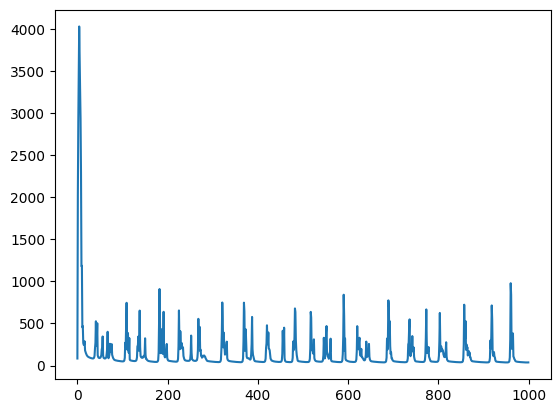

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), [e.to("cpu") for e in loss_save_arr])